In [1]:
from google.colab import files
uploaded = files.upload()


Saving cv_programmers.csv to cv_programmers.csv


In [2]:
import pandas as pd
import io

df = pd.read_csv(io.BytesIO(uploaded['cv_programmers.csv']),encoding='cp1251', parse_dates = ['date_create', 'date_modify', 'published_date'])

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import plotly.graph_objects as go
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 500)

## Предварительный анализ данных

In [4]:
df.dtypes

Unnamed: 0                                                       int64
id                                                              object
abilympics_inspection_status                                    object
abilympics_participation                                          bool
worldskills_inspection_status                                   object
state_region_code                                                int64
regionNameTerm                                                 float64
position_name                                                   object
date_create                      datetime64[ns, pytz.FixedOffset(180)]
date_modify                      datetime64[ns, pytz.FixedOffset(180)]
home_city_code                                                   int64
education                                                       object
academic_degree                                                float64
drive_license                                                   object
code_c

В нашем датасете 425 наблюдений. Есть переменные, содержание которых требует уточнения. Посмотрим на них более пристально, и оценим полезность с точки зрения предсказания целевой переменной.

Добавим такие переменные в *check_df*, посмотрим вариативность и количество пропусков для переменных:

###Изучение содержания данных

In [5]:
check_df = df[['abilympics_inspection_status', 'abilympics_participation', 'worldskills_inspection_status', 'regionNameTerm', \
               'academic_degree', 'drive_license', 'add_skills', 'nark_inspection_status', 'nark_certificate', 'professional_skills', 'other_certificates', \
               'retraining_capability',	'other_info', 'publication_period',	'rf_citizen',	'status',	'visibility',	'code_external_system',	'deleted', \
               'additionalEducationList',	'desirableRelocationRegions', 'worldskills', 'languageKnowledge',	'hardSkills',	'softSkills']]

In [6]:
check_df.head(3)

,abilympics_inspection_status,abilympics_participation,worldskills_inspection_status,regionNameTerm,academic_degree,drive_license,add_skills,nark_inspection_status,nark_certificate,professional_skills,other_certificates,retraining_capability,other_info,publication_period,rf_citizen,status,visibility,code_external_system,deleted,additionalEducationList,desirableRelocationRegions,worldskills,languageKnowledge,hardSkills,softSkills
0,UNKNOWN,False,NOT_APPLICABLE,NaN,NaN,[],NaN,NOT_APPLICABLE,NaN,NaN,<p>Присвоен-классный-чин-государственной-гражд...,Готов-к-переобучению,NaN,0.0,True,ACCEPTED,VISIBLE_TO_ALL,NaN,False,[],[],[],"[{""code_language"": ""Английский"", ""level"": ""Чте...",[],[]
1,UNKNOWN,False,NOT_APPLICABLE,NaN,NaN,[],NaN,NOT_APPLICABLE,NaN,NaN,NaN,Готов-к-переобучению,NaN,0.0,True,ACCEPTED,VISIBLE_TO_ALL,NaN,False,[],[],[],"[{""code_language"": ""Русский"", ""level"": ""Родной...",[],[]
2,UNKNOWN,False,NOT_APPLICABLE,NaN,NaN,[],NaN,NOT_APPLICABLE,NaN,NaN,NaN,Готов-к-переобучению,NaN,0.0,True,ACCEPTED,VISIBLE_TO_ALL,NaN,False,[],[],[],"[{""code_language"": ""Французский"", ""level"": ""Ба...","[{""hard_skill_name"": ""стрессоустойчивость"", ""o...","[{""owner_id"": ""02efefb0-0e43-11ed-81ab-7fb917d..."


In [7]:
check_df.shape

(425, 25)

In [8]:
for i in check_df:
  print(i, check_df[i].nunique(), check_df[i].isnull().sum())

abilympics_inspection_status 1 0
abilympics_participation 2 0
worldskills_inspection_status 2 0
regionNameTerm 0 425
academic_degree 0 425
drive_license 4 0
add_skills 20 405
nark_inspection_status 3 0
nark_certificate 1 420
professional_skills 27 397
other_certificates 24 388
retraining_capability 2 0
other_info 7 417
publication_period 1 0
rf_citizen 2 0
status 2 0
visibility 1 0
code_external_system 0 425
deleted 1 0
additionalEducationList 40 0
desirableRelocationRegions 13 0
worldskills 5 0
languageKnowledge 308 0
hardSkills 172 0
softSkills 142 0


In [9]:
check_df.worldskills_inspection_status.value_counts()

NOT_APPLICABLE    421
WAITING             4
Name: worldskills_inspection_status, dtype: int64

In [10]:
df.loc[(df['worldskills_inspection_status'] == 'WAITING')]

,Unnamed: 0,id,abilympics_inspection_status,abilympics_participation,worldskills_inspection_status,state_region_code,regionNameTerm,position_name,date_create,date_modify,home_city_code,education,academic_degree,drive_license,code_country,nark_inspection_status,nark_certificate,published_date,schedule_type,experience,salary,professional_skills,add_skills,busy_type,business_trip,id_candidate,other_certificates,retraining_capability,other_info,id_user,publication_period,rf_citizen,status,visibility,code_external_system,deleted,fullness_rate,professionList,workExperienceList,educationList,additionalEducationList,desirableRelocationRegions,contactList,worldskills,languageKnowledge,hardSkills,softSkills,localityName
49,11275,12264210-dd1d-11ec-818b-1b29d3b53cbb,UNKNOWN,False,WAITING,7800000000000,NaN,Программист-C#,2022-05-26 20:55:47+03:00,2022-05-26 21:16:17+03:00,7800000000000,Среднее-профессиональное,NaN,[],RU,NOT_APPLICABLE,NaN,2022-05-27 10:24:40+03:00,"Гибкий-график,Сменный-график,Полный-рабочий-де...",1,40000,NaN,NaN,Полная-занятость,Готов-к-командировкам,076d8930-dd1a-11ec-aec6-af9a27d731ed,NaN,Не-готов-к-переобучению,NaN,048b3b20-8e30-11eb-9809-5d9e90ab9534,0.0,True,ACCEPTED,VISIBLE_TO_ALL,NaN,False,84,"[{""code_profession"": ""258573"", ""code_professio...","[{""company_name"": ""NEVA-DELTA"", ""date_from"": ""...","[{""diploma_name"": ""Мобильное приложение для на...",[],[],"[{""contact_type"": ""Эл. почта"", ""is_moderated"":...","[{""owner_id"": ""12264210-dd1d-11ec-818b-1b29d3b...","[{""code_language"": ""Английский"", ""level"": ""Спо...","[{""hard_skill_name"": ""программирование"", ""owne...","[{""owner_id"": ""12264210-dd1d-11ec-818b-1b29d3b...",г.-Санкт-Петербург
158,35702,13cc1250-0e7f-11ed-87a0-fdf9f86d256a,UNKNOWN,False,WAITING,5900000000000,NaN,Инженер-программист,2022-07-28 17:10:47+03:00,2022-07-28 17:26:31+03:00,5900000200000,Среднее-профессиональное,NaN,[],RU,NOT_APPLICABLE,NaN,2022-08-05 11:02:09+03:00,Полный-рабочий-день,0,25000,NaN,NaN,Полная-занятость,Готов-к-командировкам,34b21b40-0e7a-11ed-9e91-e32b7fec41d1,NaN,Готов-к-переобучению,NaN,db6190e0-4af8-11e9-8048-5d9e90ab9534,0.0,True,ACCEPTED,VISIBLE_TO_ALL,NaN,False,92,"[{""code_profession"": ""258573"", ""code_professio...","[{""company_name"": ""ПАО \""Уралкалий\"" БКПРУ-4 (...","[{""diploma_name"": ""Разработка мобильного прило...",[],[],"[{""contact_type"": ""Эл. почта"", ""is_moderated"":...","[{""internationalName"": ""IT Software Solutions ...","[{""code_language"": ""Английский"", ""level"": ""Спо...","[{""hard_skill_name"": ""поддержание и развитие к...","[{""owner_id"": ""13cc1250-0e7f-11ed-87a0-fdf9f86...","Пермский-край,-г.-Березники"
249,58666,167f9bd0-c6fd-11ec-a9c3-5b1b13d7f12f,UNKNOWN,False,WAITING,6300000000000,NaN,Программист,2022-04-28 17:11:24+03:00,2022-05-12 11:17:41+03:00,6300000700000,Среднее-профессиональное,NaN,[],RU,NOT_APPLICABLE,NaN,2022-05-12 12:29:38+03:00,Полный-рабочий-день,0,20000,NaN,NaN,Стажировка,Не-готов-к-командировкам,5334e540-c6f7-11ec-884a-8b73fce3b7f1,<p>Удостоверение-от-28.06.2021-г.-о-повышении-...,Готов-к-переобучению,NaN,21acffa0-2026-11e5-8442-1ff705945672,0.0,True,ACCEPTED,VISIBLE_TO_ALL,NaN,False,75,"[{""code_profession"": ""258573"", ""code_professio...",[],"[{""diploma_name"": ""Разработка программного мод...",[],[],"[{""contact_type"": ""Эл. почта"", ""is_moderated"":...","[{""internationalName"": ""IT Software Solutions ...","[{""code_language"": ""Английский"", ""level"": ""Баз...",[],[],"Самарская-область,-г.-Тольятти"
395,96045,00444c00-1999-11ed-9524-7fb917d16256,UNKNOWN,False,WAITING,3900000000000,NaN,Junior-C#/PHP-программист,2022-08-11 20:14:04+03:00,2023-01-07 18:30:57+03:00,3900000100000,Среднее-профессиональное,NaN,['B'],RU,NOT_APPLICABLE,NaN,2023-01-10 19:31:21+03:00,"Ненормированный-рабочий-день,Гибкий-график,Сме...",0,20000,NaN,NaN,Полная-занятость,Не-готов-к-командировкам,a6365200-1996-11ed-a229-21fa27ff7e02,NaN,Готов-к-переобучению,NaN,ed985620-14a0-11ed-80d4-296f7e9e4719,0.0,True,AC

In [11]:
check_df.abilympics_participation.value_counts(normalize = True)

False    0.995294
True     0.004706
Name: abilympics_participation, dtype: float64

In [12]:
df.loc[(df['abilympics_participation'] == True)]

,Unnamed: 0,id,abilympics_inspection_status,abilympics_participation,worldskills_inspection_status,state_region_code,regionNameTerm,position_name,date_create,date_modify,home_city_code,education,academic_degree,drive_license,code_country,nark_inspection_status,nark_certificate,published_date,schedule_type,experience,salary,professional_skills,add_skills,busy_type,business_trip,id_candidate,other_certificates,retraining_capability,other_info,id_user,publication_period,rf_citizen,status,visibility,code_external_system,deleted,fullness_rate,professionList,workExperienceList,educationList,additionalEducationList,desirableRelocationRegions,contactList,worldskills,languageKnowledge,hardSkills,softSkills,localityName
58,13780,11005730-38af-11ec-98d5-1b29d3b53cbb,UNKNOWN,True,NOT_APPLICABLE,5100000000000,NaN,Программист,2021-10-29 14:55:09+03:00,2021-10-31 14:06:51+03:00,5100000100000,Среднее-профессиональное,NaN,[],RU,NOT_APPLICABLE,NaN,2021-11-01 08:50:21+03:00,"Гибкий-график,Полный-рабочий-день",0,20000,NaN,NaN,Полная-занятость,Не-готов-к-командировкам,6abfff60-388b-11ec-83d9-a75f74b7b031,<p>Участник-регионального-этапа-профессиональн...,Готов-к-переобучению,NaN,219531a0-be69-11e9-adf3-5d9e90ab9534,0.0,True,ACCEPTED,VISIBLE_TO_ALL,NaN,False,72,"[{""code_profession"": ""258573"", ""code_professio...",[],"[{""diploma_name"": ""Учет оборудования в ООО «Ко...",[],[],"[{""contact_type"": ""Эл. почта"", ""is_moderated"":...",[],"[{""code_language"": ""Английский"", ""level"": ""Баз...",[],[],"Мурманская-область,-г.-Мурманск"
269,64206,182430a0-39a7-11ed-ae43-7fb917d16256,UNKNOWN,True,NOT_APPLICABLE,5400000000000,NaN,Программист,2022-09-21 15:15:34+03:00,2022-09-21 15:57:28+03:00,5400000100000,Среднее-профессиональное,NaN,[],RU,NOT_APPLICABLE,NaN,2022-09-22 07:03:01+03:00,Неполный-рабочий-день,0,15000,NaN,NaN,Стажировка,Не-готов-к-командировкам,88d6f3d0-3be9-11ec-a077-7bf9d8e248ac,NaN,Готов-к-переобучению,NaN,62048930-ef62-11eb-8d2d-195c1cfba751,0.0,True,ACCEPTED,VISIBLE_TO_ALL,NaN,False,76,"[{""code_profession"": ""258573"", ""code_professio...","[{""company_name"": ""Центральный Сибирский ботан...","[{""diploma_name"": ""Разработка веб-сайта интерн...",[],[],"[{""contact_type"": ""Эл. почта"", ""is_moderated"":...",[],"[{""code_language"": ""Английский"", ""level"": ""Сво...","[{""hard_skill_name"": ""знание компьютерных прог...","[{""owner_id"": ""182430a0-39a7-11ed-ae43-7fb917d...","Новосибирская-область,-г.-Новосибирск"


In [13]:
df.loc[(df['abilympics_participation'] == False)].head(3)

,Unnamed: 0,id,abilympics_inspection_status,abilympics_participation,worldskills_inspection_status,state_region_code,regionNameTerm,position_name,date_create,date_modify,home_city_code,education,academic_degree,drive_license,code_country,nark_inspection_status,nark_certificate,published_date,schedule_type,experience,salary,professional_skills,add_skills,busy_type,business_trip,id_candidate,other_certificates,retraining_capability,other_info,id_user,publication_period,rf_citizen,status,visibility,code_external_system,deleted,fullness_rate,professionList,workExperienceList,educationList,additionalEducationList,desirableRelocationRegions,contactList,worldskills,languageKnowledge,hardSkills,softSkills,localityName
0,44,02f70fc0-5142-11ec-b050-1b29d3b53cbb,UNKNOWN,False,NOT_APPLICABLE,6100000000000,NaN,Техник-программист,2021-11-29 21:27:30+03:00,2021-11-29 21:29:16+03:00,6100000100000,Среднее-профессиональное,NaN,[],RU,NOT_APPLICABLE,NaN,2021-11-30 10:50:53+03:00,"Сменный-график,Неполный-рабочий-день,Полный-ра...",2,30000,NaN,NaN,Полная-занятость,Готов-к-командировкам,c306aef0-19cc-11eb-a336-736ab11edb0c,<p>Присвоен-классный-чин-государственной-гражд...,Готов-к-переобучению,NaN,c60a1390-249e-11e5-b38b-1ff705945672,0.0,True,ACCEPTED,VISIBLE_TO_ALL,NaN,False,79,"[{""code_profession"": ""270999"", ""code_professio...","[{""company_name"": ""Индивидуальный предпринимат...","[{""diploma_name"": ""Проектирование и разработка...",[],[],"[{""contact_type"": ""Эл. почта"", ""is_moderated"":...",[],"[{""code_language"": ""Английский"", ""level"": ""Чте...",[],[],"Ростовская-область,-г.-Ростов-на-Дону"
1,54,02f6df20-3b3d-11ec-a60c-839f0d9a4379,UNKNOWN,False,NOT_APPLICABLE,7800000000000,NaN,Программист,2021-11-01 20:56:17+03:00,2021-11-28 19:12:25+03:00,7800000000000,Среднее,NaN,[],RU,NOT_APPLICABLE,NaN,2021-11-28 19:18:18+03:00,"Гибкий-график,Сменный-график,Полный-рабочий-день",14,30000,NaN,NaN,Полная-занятость,Не-готов-к-командировкам,70f11d60-3b38-11ec-a077-7bf9d8e248ac,NaN,Готов-к-переобучению,NaN,048b3b20-8e30-11eb-9809-5d9e90ab9534,0.0,True,ACCEPTED,VISIBLE_TO_ALL,NaN,False,69,"[{""code_profession"": ""258573"", ""code_professio...","[{""company_name"": ""Corbina Telecom"", ""date_fro...","[{""graduate_year"": 1995, ""institute_name"": ""Шк...",[],[],"[{""contact_type"": ""Эл. почта"", ""is_moderated"":...",[],"[{""code_language"": ""Русский"", ""level"": ""Родной...",[],[],г.-Санкт-Петербург
2,294,02efefb0-0e43-11ed-81ab-7fb917d16256,UNKNOWN,False,NOT_APPLICABLE,5600000000000,NaN,Программист,2022-07-28 10:00:49+03:00,2022-07-29 10:30:56+03:00,5600000200000,Среднее,NaN,[],RU,NOT_APPLICABLE,NaN,2022-07-29 14:04:11+03:00,"Гибкий-график,Полный-рабочий-день,Вахтовый-метод",0,25000,NaN,NaN,Удаленная,Не-готов-к-командировкам,6fef4e90-028a-11ed-8c5e-add87b92f9ec,NaN,Готов-к-переобучению,NaN,dbeca090-18c5-11e5-b612-1ff705945672,0.0,True,ACCEPTED,VISIBLE_TO_ALL,NaN,False,73,"[{""code_profession"": ""258573"", ""code_professio...","[{""company_name"": ""КФКСТ и МП г. Медногорска"",...","[{""graduate_year"": 2020, ""institute_name"": ""мб...",[],[],"[{""contact_type"": ""Эл. почта"", ""is_moderated"":...",[],"[{""code_language"": ""Французский"", ""level"": ""Ба...","[{""hard_skill_name"": ""стрессоустойчивость"", ""o...","[{""owner_id"": ""02efefb0-0e43-11ed-81ab-7fb917d...","Оренбургская-область,-г.-Медногорск"


In [14]:
check_df.academic_degree.value_counts()

Series([], Name: academic_degree, dtype: int64)

In [15]:
check_df.drive_license.value_counts()

[]            352
['B']          56
['B',-'C']     14
['A',-'B']      3
Name: drive_license, dtype: int64

In [16]:
check_df.nark_inspection_status.value_counts()

NOT_APPLICABLE    420
FAILURE             3
WAITING             2
Name: nark_inspection_status, dtype: int64

In [17]:
check_df.nark_certificate.value_counts()

Свидетельство-о-независимой-оценке-квалификации    5
Name: nark_certificate, dtype: int64

In [18]:
df.loc[(df['nark_certificate'] == 'Свидетельство-о-независимой-оценке-квалификации')]

,Unnamed: 0,id,abilympics_inspection_status,abilympics_participation,worldskills_inspection_status,state_region_code,regionNameTerm,position_name,date_create,date_modify,home_city_code,education,academic_degree,drive_license,code_country,nark_inspection_status,nark_certificate,published_date,schedule_type,experience,salary,professional_skills,add_skills,busy_type,business_trip,id_candidate,other_certificates,retraining_capability,other_info,id_user,publication_period,rf_citizen,status,visibility,code_external_system,deleted,fullness_rate,professionList,workExperienceList,educationList,additionalEducationList,desirableRelocationRegions,contactList,worldskills,languageKnowledge,hardSkills,softSkills,localityName
173,39909,1409aa60-e7d9-11ec-8bbe-956717074877,UNKNOWN,False,NOT_APPLICABLE,2100000000000,NaN,Программист,2022-06-09 12:46:47+03:00,2022-06-10 12:34:54+03:00,2100002400000,Среднее,NaN,['B'],RU,FAILURE,Свидетельство-о-независимой-оценке-квалификации,2022-06-14 09:19:50+03:00,"Гибкий-график,Неполный-рабочий-день",0,50000,NaN,NaN,Удаленная,Не-готов-к-командировкам,28a03280-a8d1-11ea-842d-f3e0740405b3,NaN,Готов-к-переобучению,NaN,aaba6340-c5d1-11ea-bd8a-195c1cfba751,0.0,True,ACCEPTED,VISIBLE_TO_ALL,NaN,False,72,"[{""code_profession"": ""258573"", ""code_professio...","[{""company_name"": ""АО Тандер"", ""date_from"": ""2...","[{""faculty"": ""Строительный"", ""graduate_year"": ...",[],[],"[{""contact_type"": ""Эл. почта"", ""is_moderated"":...",[],"[{""code_language"": ""Английский"", ""level"": ""Чте...",[],[],"Чувашская-Республика,-г.-Новочебоксарск"
185,44102,16f95910-3789-11ec-ac4c-839f0d9a4379,UNKNOWN,False,NOT_APPLICABLE,2900000000000,NaN,Сис-админ/Программист-C#/Графический-Дизайнер,2021-10-28 03:50:47+03:00,2021-10-28 15:29:34+03:00,2900000300000,Среднее-профессиональное,NaN,[],RU,WAITING,Свидетельство-о-независимой-оценке-квалификации,2021-10-29 11:08:46+03:00,"Гибкий-график,Сменный-график,Полный-рабочий-де...",0,29998,NaN,NaN,Полная-занятость,Готов-к-командировкам,d0680cf0-36a0-11ec-a077-7bf9d8e248ac,"<p><br-data-mce-bogus=""1""></p>",Готов-к-переобучению,NaN,ef07f800-19b5-11e5-8d85-1ff705945672,0.0,True,ACCEPTED,VISIBLE_TO_ALL,NaN,False,82,"[{""code_profession"": ""258573"", ""code_professio...",[],"[{""diploma_name"": ""Автоматизация автомойки сам...",[],[],"[{""contact_type"": ""Эл. почта"", ""is_moderated"":...",[],"[{""code_language"": ""Английский"", ""level"": ""Сво...",[],[],"Архангельская-область,-г.-Новодвинск"
248,58472,1743abc0-8278-11ec-954c-5b1b13d7f12f,UNKNOWN,False,NOT_APPLICABLE,7400000000000,NaN,Программист,2022-01-31 12:28:03+03:00,2022-06-30 15:01:25+03:00,7404400100000,Среднее,NaN,['B'],RU,FAILURE,Свидетельство-о-независимой-оценке-квалификации,2022-01-31 13:28:54+03:00,Полный-рабочий-день,0,40000,NaN,NaN,Полная-занятость,Не-готов-к-командировкам,df53b130-341e-11ec-a200-435dcfab4560,NaN,Готов-к-переобучению,NaN,8bdc1090-2a44-11eb-82dd-dbfd80b8ec0d,0.0,True,ACCEPTED,VISIBLE_TO_ALL,NaN,False,0,"[{""code_profession"": ""128378"", ""code_professio...","[{""company_name"": ""ООО \""Оазис\"""", ""date_from""...","[{""graduate_year"": 2008, ""institute_name"": ""АН...",[],[],"[{""contact_type"": ""Эл. почта"", ""is_moderated"":...",[],"[{""code_language"": ""Русский"", ""level"": ""Родной...",[],[],"Челябинская-область,-г.-Еманжелинск"
282,67827,1939e380-076c-11ed-a70f-59084e7b664d,UNKNOWN,False,NOT_APPLICABLE,4000000000000,NaN,Программист,2022-07-19 17:07:17+03:00,2022-07-19 17:07:17+03:00,4000000100000,Среднее-профессиональное,NaN,['B'],RU,FAILURE,Свидетельство-о-независимой-оценке-квалификации,2022-07-19 17:14:28+03:00,"Гибкий-график,Сменный-график,Неполный-рабочий-...",0,40000,NaN,NaN,Частичная-занятость,Готов-к-командировкам,65a7c380-0768-11ed-8c5e-add87b92f9ec,NaN,Готов-к-переобучению,NaN,a296d280-352a-11e5-abfd-1ff705945672,0.0,True,ACCEPTED,VISIBLE_TO_ALL,NaN,False,74,"[{""code_profession"": ""258573"", ""code_professio...",[],"[{""diploma_name"": ""Разработка электронного уче...",[],[],"[{""c

In [19]:
check_df.rf_citizen.value_counts(normalize = True)

True     0.997647
False    0.002353
Name: rf_citizen, dtype: float64

In [20]:
check_df.status.value_counts(normalize = True)

ACCEPTED    0.990588
REJECTED    0.009412
Name: status, dtype: float64

In [21]:
# check_df.desirableRelocationRegions.value_counts()

In [22]:
# check_df.additionalEducationList.value_counts()

In [23]:
# check_df.worldskills.value_counts()

In [24]:
# check_df.languageKnowledge.value_counts()

In [25]:
# check_df.hardSkills.value_counts()

In [26]:
# check_df.softSkills.value_counts()

###Вывод по переменным из check_df:

***abilympics_inspection_status*** -- переменная имеет лишь одно уникальное значение UNKNOWN, что позволяет признать её неинформативной с точки зрения предсказания целевой переменной


*abilympics_participation* -- булева переменная, принимает значения False в более чем 99% случаев. Значение переменной не зависит от других переменных.


*worldskills_inspection_status* -- принимает два значения, сильный дисбаланс в пользу мажоритарного класса NOT_APPLICABLE (более 99%).


***regionNameTerm*** -- число уникальных значений равно нулю, исключим переменную


***academic_degree*** -- число уникальных значений равно нулю, исключим переменную


*drive_license* -- возможные уникальные значения: ['B'], ['B',-'C'], ['A',-'B'], []; значение пустого списка может означать или отсутствие лицензии, или отсутствие данных о ней.


*nark_inspection_status* -- NOT_APPLICABLE (более 98%), FAILURE, WAITING


***nark_certificate*** -- Свидетельство-о-независимой-оценке-квалификации для тех значений (1%), где nark_inspection_status принадлежит FAILURE, WAITING; так как бОльшая часть значений для данной переменной пропущена, мы не будем использовать её в дальнейшем анализе.


***professional_skills*** -- более 93% данных пропущено


***other_certificates*** -- доля пропущенных значений для переменной составляет более 91%


*retraining_capability* -- два уникальных значения: Готов-к-переобучению, Не-готов-к-переобучению, нет сильного дисбаланса классов


***other_info*** -- поле заполнено лишь для восьми наблюдений из всего набора данных, не будем использоваь эту переменную для дальнейшего анализа


***publication_period*** -- одно уникальное значение позволяет признать переменную неинформативной, исключим её


*rf_citizen* -- булева переменная, мажоритарному классу True принадлжедит более 99% наблюдений


*status* -- ACCEPTED (более 99% наблюдений) и REJECTED


***visibility*** -- VISIBLE_TO_ALL для всех наблюдений, переменная неинформативна


***code_external_system*** -- все значения переменной пропущены, переменная неинформативна


***deleted*** -- имеет лишь одну уникальную категорию False, не будем использовать переменную для дальнейшего анализа


***additionalEducationList*** -- для 90% наблюдений значение переменной не заполнено, для остальных требует дополнительного форматирования


***desirableRelocationRegions*** -- для 97% наблюдений значение переменной не заполнено, не будем включать её в дальнейший анализ.


***worldskills*** -- более чем для 99% наблюдений значения не заполнены. Данные из переменной частично дублируют другие колонки, исключим эту переменную.


*languageKnowledge* -- представлена списками из однотипных словарей, переменную можно форматировать и использовать для дальнейшего анализа


*hardSkills* -- для дальнейшего использования переменной необходимо дополнительное форматирование, для 59% данных значение переменной не заполнено


*softSkills* -- для дальнейшего использования переменной необходимо дополнительное форматирование, не заполненных значений 66%



## Предобработка данных

In [27]:
df.head(3)

,Unnamed: 0,id,abilympics_inspection_status,abilympics_participation,worldskills_inspection_status,state_region_code,regionNameTerm,position_name,date_create,date_modify,home_city_code,education,academic_degree,drive_license,code_country,nark_inspection_status,nark_certificate,published_date,schedule_type,experience,salary,professional_skills,add_skills,busy_type,business_trip,id_candidate,other_certificates,retraining_capability,other_info,id_user,publication_period,rf_citizen,status,visibility,code_external_system,deleted,fullness_rate,professionList,workExperienceList,educationList,additionalEducationList,desirableRelocationRegions,contactList,worldskills,languageKnowledge,hardSkills,softSkills,localityName
0,44,02f70fc0-5142-11ec-b050-1b29d3b53cbb,UNKNOWN,False,NOT_APPLICABLE,6100000000000,NaN,Техник-программист,2021-11-29 21:27:30+03:00,2021-11-29 21:29:16+03:00,6100000100000,Среднее-профессиональное,NaN,[],RU,NOT_APPLICABLE,NaN,2021-11-30 10:50:53+03:00,"Сменный-график,Неполный-рабочий-день,Полный-ра...",2,30000,NaN,NaN,Полная-занятость,Готов-к-командировкам,c306aef0-19cc-11eb-a336-736ab11edb0c,<p>Присвоен-классный-чин-государственной-гражд...,Готов-к-переобучению,NaN,c60a1390-249e-11e5-b38b-1ff705945672,0.0,True,ACCEPTED,VISIBLE_TO_ALL,NaN,False,79,"[{""code_profession"": ""270999"", ""code_professio...","[{""company_name"": ""Индивидуальный предпринимат...","[{""diploma_name"": ""Проектирование и разработка...",[],[],"[{""contact_type"": ""Эл. почта"", ""is_moderated"":...",[],"[{""code_language"": ""Английский"", ""level"": ""Чте...",[],[],"Ростовская-область,-г.-Ростов-на-Дону"
1,54,02f6df20-3b3d-11ec-a60c-839f0d9a4379,UNKNOWN,False,NOT_APPLICABLE,7800000000000,NaN,Программист,2021-11-01 20:56:17+03:00,2021-11-28 19:12:25+03:00,7800000000000,Среднее,NaN,[],RU,NOT_APPLICABLE,NaN,2021-11-28 19:18:18+03:00,"Гибкий-график,Сменный-график,Полный-рабочий-день",14,30000,NaN,NaN,Полная-занятость,Не-готов-к-командировкам,70f11d60-3b38-11ec-a077-7bf9d8e248ac,NaN,Готов-к-переобучению,NaN,048b3b20-8e30-11eb-9809-5d9e90ab9534,0.0,True,ACCEPTED,VISIBLE_TO_ALL,NaN,False,69,"[{""code_profession"": ""258573"", ""code_professio...","[{""company_name"": ""Corbina Telecom"", ""date_fro...","[{""graduate_year"": 1995, ""institute_name"": ""Шк...",[],[],"[{""contact_type"": ""Эл. почта"", ""is_moderated"":...",[],"[{""code_language"": ""Русский"", ""level"": ""Родной...",[],[],г.-Санкт-Петербург
2,294,02efefb0-0e43-11ed-81ab-7fb917d16256,UNKNOWN,False,NOT_APPLICABLE,5600000000000,NaN,Программист,2022-07-28 10:00:49+03:00,2022-07-29 10:30:56+03:00,5600000200000,Среднее,NaN,[],RU,NOT_APPLICABLE,NaN,2022-07-29 14:04:11+03:00,"Гибкий-график,Полный-рабочий-день,Вахтовый-метод",0,25000,NaN,NaN,Удаленная,Не-готов-к-командировкам,6fef4e90-028a-11ed-8c5e-add87b92f9ec,NaN,Готов-к-переобучению,NaN,dbeca090-18c5-11e5-b612-1ff705945672,0.0,True,ACCEPTED,VISIBLE_TO_ALL,NaN,False,73,"[{""code_profession"": ""258573"", ""code_professio...","[{""company_name"": ""КФКСТ и МП г. Медногорска"",...","[{""graduate_year"": 2020, ""institute_name"": ""мб...",[],[],"[{""contact_type"": ""Эл. почта"", ""is_moderated"":...",[],"[{""code_language"": ""Французский"", ""level"": ""Ба...","[{""hard_skill_name"": ""стрессоустойчивость"", ""o...","[{""owner_id"": ""02efefb0-0e43-11ed-81ab-7fb917d...","Оренбургская-область,-г.-Медногорск"


In [28]:
def get_city(arg):

# функция извлекает название города из строки
# возвращает три значения: Город-миллионер, Город-мультимиллионер или Другие

    million_cities = ['Новосибирск', 'Екатеринбург', 'Нижний Новгород', 'Казань', 'Челябинск', 'Омск', 'Самара', 'Ростов-на-Дону', 'Уфа', 'Красноярск', 'Пермь', 'Воронеж', 'Волгоград', "Минск", "Краснодар" ]
    multimillion_cities = ['Москва', 'Санкт-Петербург']

    for i in multimillion_cities:
      if i in arg:
        return 'Город-мультимиллионер'

    for i in million_cities:
      if i in arg:
        return 'Город-миллионер'

    else:
      return 'Другие'


In [29]:
df["city"] = df["localityName"].apply(get_city)

In [30]:
df["city"].value_counts(normalize=True)

Другие                   0.675294
Город-миллионер          0.242353
Город-мультимиллионер    0.082353
Name: city, dtype: float64

In [31]:
df.duplicated().value_counts()

False    425
dtype: int64

In [32]:
# удаляем константные признаки

const_columns = [col for col in df.columns if df[col].nunique() == 1]
const_columns

['abilympics_inspection_status',
 'nark_certificate',
 'publication_period',
 'visibility',
 'deleted']

In [33]:
df.drop(const_columns, axis = 1, inplace = True)

В качестве порога выберем 80% пропущенных значений от всех наблюдений. Переменные, в которых число пропущенных значений превышает порог, станут претендентами на исключение из модели

In [34]:
missing_ratio = df.shape[0] * 0.80

In [35]:
missing_columns = [col for col in df.columns if df[col].isnull().sum() > missing_ratio]
missing_columns

['regionNameTerm',
 'academic_degree',
 'professional_skills',
 'add_skills',
 'other_certificates',
 'other_info',
 'code_external_system']

In [36]:
df.drop(missing_columns, axis = 1, inplace = True)

In [37]:
df.drop(['additionalEducationList', 'desirableRelocationRegions', 'worldskills', 'Unnamed: 0'], axis = 1 , inplace = True)

In [38]:
df['drive_license'] = df['drive_license'].replace(['[]',"['A',-'B']", "['B']", "['B',-'C']"], ['Unknown', 'A-B', 'B', 'B-C'])

In [39]:
df.drive_license.value_counts()

Unknown    352
B           56
B-C         14
A-B          3
Name: drive_license, dtype: int64

Проверим оставшиеся признаки на наличие пропусков и заполним их

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425 entries, 0 to 424
Data columns (total 33 columns):
 #   Column                         Non-Null Count  Dtype                                
---  ------                         --------------  -----                                
 0   id                             425 non-null    object                               
 1   abilympics_participation       425 non-null    bool                                 
 2   worldskills_inspection_status  425 non-null    object                               
 3   state_region_code              425 non-null    int64                                
 4   position_name                  425 non-null    object                               
 5   date_create                    425 non-null    datetime64[ns, pytz.FixedOffset(180)]
 6   date_modify                    425 non-null    datetime64[ns, pytz.FixedOffset(180)]
 7   home_city_code                 425 non-null    int64                            

In [41]:
missing_cnt = df.isnull().sum().sort_values()
missing_cnt[missing_cnt > 0]

published_date     4
education         58
dtype: int64

Переменная *education* имеет тип object, для нее я добавлю еще один класс 'unknown', заполню им пропущенные значения:

In [42]:
for col in ['education']:
    df[col].fillna('Unknown', inplace = True)

In [43]:
df.education.value_counts()

Высшее                      178
Среднее-профессиональное    126
Unknown                      58
Среднее                      46
Незаконченное-высшее         17
Name: education, dtype: int64

Оставим один уникальный идентификационный номер:

In [44]:
df.id.nunique(), df.id_candidate.nunique(), df.id_user.nunique()

(425, 424, 317)

In [45]:
df.drop(['id_candidate', 'id_user'], axis = 1 , inplace = True)

In [46]:
df.date_create.min(), df.date_create.max(), df.date_create.count()

(Timestamp('2016-10-22 22:53:45+0300', tz='pytz.FixedOffset(180)'),
 Timestamp('2023-03-21 13:42:29+0300', tz='pytz.FixedOffset(180)'),
 425)

In [47]:
df.date_modify.min(), df.date_modify.max(), df.date_modify.count()

(Timestamp('2017-12-11 13:06:52+0300', tz='pytz.FixedOffset(180)'),
 Timestamp('2023-03-21 17:38:00+0300', tz='pytz.FixedOffset(180)'),
 425)

In [48]:
df.published_date.min(), df.published_date.max(), df.published_date.count()

(Timestamp('2017-12-11 13:22:27+0300', tz='pytz.FixedOffset(180)'),
 Timestamp('2023-03-22 11:45:38+0300', tz='pytz.FixedOffset(180)'),
 421)

Записи вносились во временной промежуток с октября 2016 года по март 2023. Для дальнейшего разбиения на тестовый и тренировочный датасеты лучше сортировать данные о заработных платах в хронологическом порядке. В качестве даты для сортировки будет использован столбец *date_create*.

In [49]:
df.sort_values(by = ['date_create', 'date_modify'], inplace = True)

In [50]:
df.reset_index(drop = True, inplace = True)

In [51]:
df.drop(['professionList',	'workExperienceList',	'educationList',	'contactList',	'localityName'], axis = 1 , inplace = True)
df.drop(['languageKnowledge',	'hardSkills',	'softSkills'], axis = 1, inplace = True)

###Обработка значений для типа object

In [52]:
df.position_name = df.position_name.str.lower()

In [53]:
df.position_name.value_counts()

программист                             229
инженер-программист                      28
техник-программист                       21
программист-1с                           15
web-программист                           5
                                       ... 
программист,-системный-администратор      1
программист-с+                            1
программист/экономист                     1
программист-станков-с-чпу                 1
помощник-программиста                     1
Name: position_name, Length: 110, dtype: int64

In [54]:
df.schedule_type.value_counts()

Полный-рабочий-день                                                                                                   247
Гибкий-график,Полный-рабочий-день                                                                                      14
Гибкий-график,Полный-рабочий-день,Неполный-рабочий-день                                                                11
Гибкий-график,Сменный-график,Полный-рабочий-день                                                                       11
Гибкий-график,Сменный-график,Полный-рабочий-день,Неполный-рабочий-день                                                 10
Ненормированный-рабочий-день,Гибкий-график,Сменный-график,Полный-рабочий-день,Неполный-рабочий-день                    10
Сменный-график,Полный-рабочий-день                                                                                      9
Гибкий-график,Неполный-рабочий-день                                                                                     9
Ненормированный-рабочий-

В резюме можно указывать различные комбинации уникальных значений, что порождает большое число категорий признака. Исправим это при помощи One Hot Encoding:

In [55]:
schedules = ['Ненормированный-рабочий-день', 'Гибкий-график', 'Сменный-график', 'Полный-рабочий-день', 'Неполный-рабочий-день', 'Вахтовый-метод']

for schedule in schedules:
    df[schedule] = df['schedule_type'].apply(lambda x: schedule in x)


In [56]:
df['Полный-рабочий-день'].value_counts()

True     378
False     47
Name: Полный-рабочий-день, dtype: int64

##Визуализация

In [57]:
df.describe()

,state_region_code,home_city_code,experience,salary,fullness_rate
count,4.250000e+02,4.250000e+02,425.000000,425.000000,425.000000
mean,4.487059e+12,4.487466e+12,3.296471,46426.835294,66.891765
std,2.501754e+12,2.501793e+12,6.191642,40432.473215,14.335684
min,1.000000e+11,1.000002e+11,0.000000,0.000000,0.000000
25%,2.300000e+12,2.300000e+12,0.000000,25000.000000,61.000000
50%,5.000000e+12,5.000003e+12,1.000000,40000.000000,67.000000
75%,6.600000e+12,6.600001e+12,4.000000,50000.000000,75.000000
max,9.100000e+12,9.101200e+12,52.000000,350000.000000,100.000000


Целевая переменная -- salary. Из метода describe можем увидеть, что между наименьшим и наибольшим значением вариационного ряда большой размах, распределение смещено вправо

In [58]:
# df.salary = np.log1p(df.salary.astype(float))

Text(0.5, 0, 'Salary')

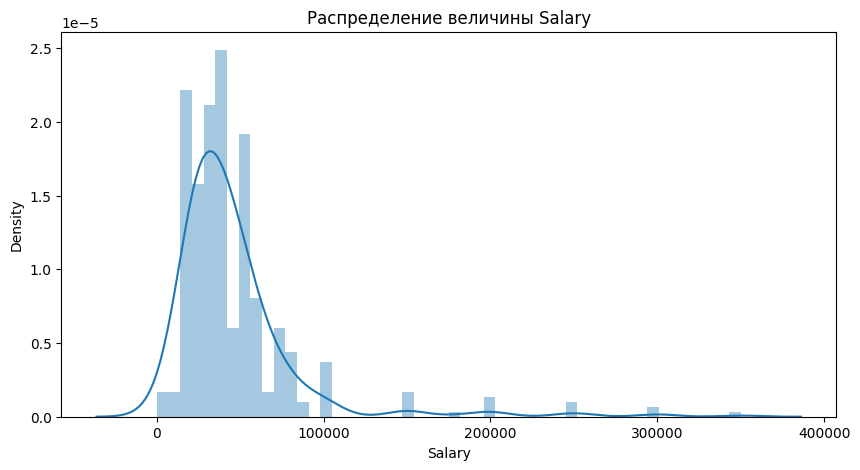

In [59]:
plt.figure(figsize = (10,5))
sns.distplot(df.salary)
plt.title("Распределение величины Salary")
plt.xlabel("Salary")

Распределение имеет тяжелый хвост справа, что свидетельствует о выбросах в виде высоких значений зарплаты

После применения непрерывного монотонного преобразования целевой переменной (логарифмирования), распределение величины выглядит компактным и больше походит на нормальное

Text(0.5, 0, 'Salary')

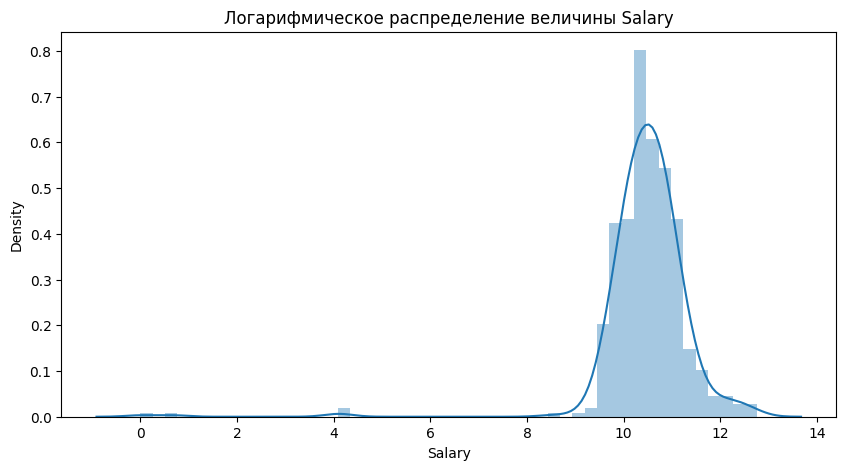

In [60]:
plt.figure(figsize = (10,5))
sns.distplot(np.log1p(df.salary.astype(float)))
plt.title("Логарифмическое распределение величины Salary")
plt.xlabel("Salary")

In [61]:
fig = px.box(df, y="salary", points="all")
fig.show()

Есть выбросы после 100k

In [62]:
df.loc[(df['salary'] == 0)]

,id,abilympics_participation,worldskills_inspection_status,state_region_code,position_name,date_create,date_modify,home_city_code,education,drive_license,code_country,nark_inspection_status,published_date,schedule_type,experience,salary,busy_type,business_trip,retraining_capability,rf_citizen,status,fullness_rate,city,Ненормированный-рабочий-день,Гибкий-график,Сменный-график,Полный-рабочий-день,Неполный-рабочий-день,Вахтовый-метод
408,12f6a110-9980-11ed-9cc9-e57b87a63fa7,False,NOT_APPLICABLE,6400000000000,программист,2023-01-21 14:38:07+03:00,2023-01-21 15:02:57+03:00,6400000100000,Незаконченное-высшее,Unknown,RU,NOT_APPLICABLE,2023-01-23 09:09:46+03:00,"Гибкий-график,Неполный-рабочий-день",0,0,Стажировка,Не-готов-к-командировкам,Готов-к-переобучению,True,ACCEPTED,71,Другие,False,True,False,False,True,False


Существует одно наблюдение с зарплатой, равной нулю. Разница между полем date_create и published_date составляет два дня. Возможно, значение целевой переменной обусловлено тем, что сотрудник недавно устроился на работу и пока не получил заработную плату

In [63]:
df.loc[(df['salary'] == 1)]

,id,abilympics_participation,worldskills_inspection_status,state_region_code,position_name,date_create,date_modify,home_city_code,education,drive_license,code_country,nark_inspection_status,published_date,schedule_type,experience,salary,busy_type,business_trip,retraining_capability,rf_citizen,status,fullness_rate,city,Ненормированный-рабочий-день,Гибкий-график,Сменный-график,Полный-рабочий-день,Неполный-рабочий-день,Вахтовый-метод
403,12ad32e0-91a7-11ed-994c-27c2a54abdc4,False,NOT_APPLICABLE,3800000000000,программист-оператор,2023-01-11 14:57:07+03:00,2023-01-11 14:57:07+03:00,3800001400000,Незаконченное-высшее,Unknown,RU,NOT_APPLICABLE,2023-01-12 03:14:20+03:00,"Ненормированный-рабочий-день,Гибкий-график,Сме...",0,1,Стажировка,Готов-к-командировкам,Готов-к-переобучению,True,ACCEPTED,67,Другие,True,True,True,True,True,True


In [64]:
df.loc[(df['salary'] == 60)]

,id,abilympics_participation,worldskills_inspection_status,state_region_code,position_name,date_create,date_modify,home_city_code,education,drive_license,code_country,nark_inspection_status,published_date,schedule_type,experience,salary,busy_type,business_trip,retraining_capability,rf_citizen,status,fullness_rate,city,Ненормированный-рабочий-день,Гибкий-график,Сменный-график,Полный-рабочий-день,Неполный-рабочий-день,Вахтовый-метод
322,1915d290-279e-11ed-81e0-fdf9f86d256a,False,NOT_APPLICABLE,5000000000000,программист,2022-08-29 16:25:49+03:00,2022-08-29 16:56:10+03:00,5000003600000,Высшее,Unknown,RU,NOT_APPLICABLE,2022-08-29 16:57:32+03:00,Полный-рабочий-день,2,60,Полная-занятость,Готов-к-командировкам,Готов-к-переобучению,True,ACCEPTED,77,Другие,False,False,False,True,False,False
350,14773fa0-44a7-11ed-86f6-fdf9f86d256a,False,NOT_APPLICABLE,3100000000000,web-программист,2022-10-05 15:13:11+03:00,2022-10-05 15:13:11+03:00,3100000000000,Высшее,Unknown,RU,NOT_APPLICABLE,2022-10-19 14:39:06+03:00,"Гибкий-график,Полный-рабочий-день,Неполный-раб...",2,60,Полная-занятость,Не-готов-к-командировкам,Не-готов-к-переобучению,True,ACCEPTED,61,Другие,False,True,False,True,True,False


In [65]:
df = df[(df.salary > 60)]

**Position_name**

In [66]:
df.position_name.value_counts()

программист                             227
инженер-программист                      28
техник-программист                       21
программист-1с                           15
web-программист                           4
                                       ... 
разработчик-программист                   1
программист,-системный-администратор      1
программист-с+                            1
программист/экономист                     1
помощник-программиста                     1
Name: position_name, Length: 109, dtype: int64

In [67]:
top_10_job = df.groupby('position_name').size().reset_index().sort_values(by = 0,ascending = False)[:10]
top_10_job.columns = ['position_name', 'count']
top_10_job

,position_name,count
43,программист,227
21,инженер-программист,28
107,техник-программист,21
64,программист-1с,15
101,стажер-программист,4
9,web-программист,4
0,1с-программист,3
37,начинающий-программист,3
71,программист-python,3
97,"системный-администратор,-программист",3


In [68]:
fig = px.bar(top_10_job, x='position_name', y='count', title = 'Топ 10 позиций position_name', text_auto='.2s')
fig.show()

**Education**

In [69]:
fig = px.histogram(df, x = 'education', histnorm = 'percent', text_auto = '.2f', title = 'Распределение величины education')
fig.show()

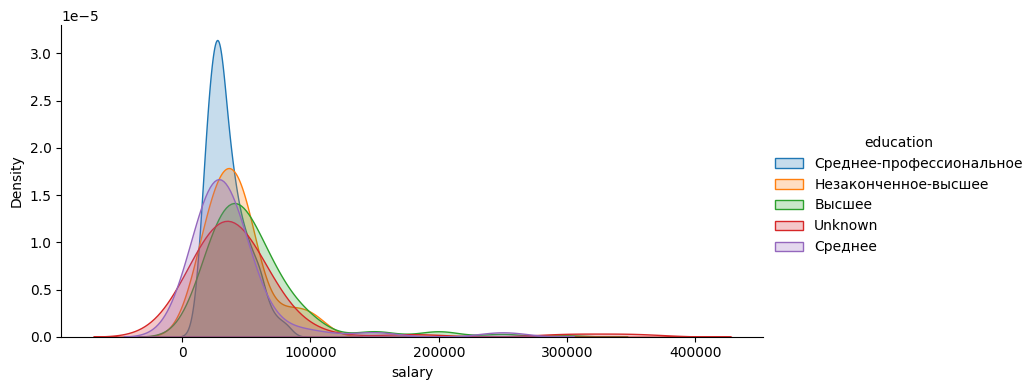

In [70]:
(sns.FacetGrid(df[(df['education'].isin(df['education'].value_counts()[:5].index.values))],\
               hue='education', height = 4, aspect = 2).map(sns.kdeplot, 'salary', fill = True).add_legend())
plt.show()

БОльшая часть опрошенных имеет высшее образование. Распределение величины заработной платы схоже для всех категорий. Однако можно заметить, что вся вероятностная масса для категории *среднее-профессиональное* сосредоточена [0; 100k],  для наблюдений, принадлежащих данной категории, выбросы в виде крайне высоких зарплат отсутствуют.

**Busy type**

In [71]:
fig = px.histogram(df, x = 'busy_type',text_auto = '.2f', title = 'Распределение величины busy_type')
fig.show()

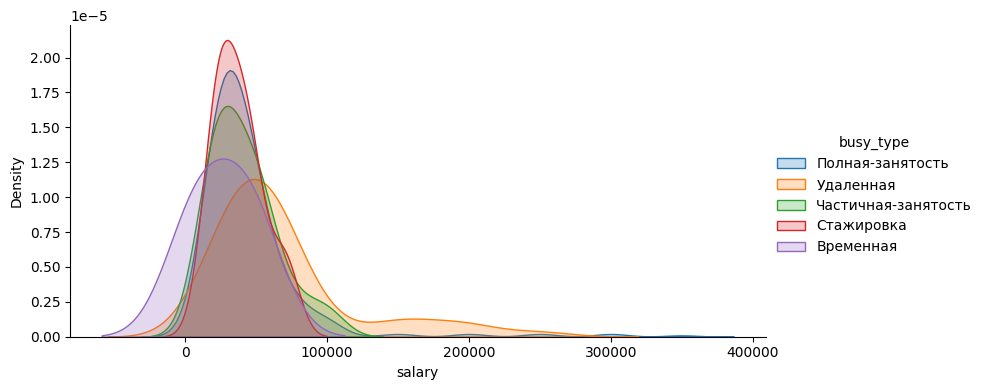

In [72]:
(sns.FacetGrid(df[(df['busy_type'].isin(df['busy_type'].value_counts()[:5].index.values)) ],\
               hue='busy_type', height = 4, aspect = 2).map(sns.kdeplot, 'salary', fill = True).add_legend())
plt.show()

Для этой переменной характерен дисбаланс классов в пользу Полной занятости.

Существенной разницы между распределениями разных категорий не выявлено. Можно лишь отметить, что распределения категориий *Частичная занятость* и *Стажировка* имеют наибольшую плотность на промежутке [0; 100k], *Полная занятость* также, но при этом класс имеет наблюдения с экстремально высокими значениями. Для *удаленной* работы распределение более пологое, доля высоких заработных плат больше чем у остальных категорий. К категории *временная работа* относится лишь два наблюдения, что не позволяет нам сделать выводы о распределении.


**Retraining capability**

In [73]:
fig = px.histogram(df, x = 'retraining_capability',  histnorm = 'percent', text_auto = '.2f', title = 'Распределение величины retraining_capability')
fig.show()

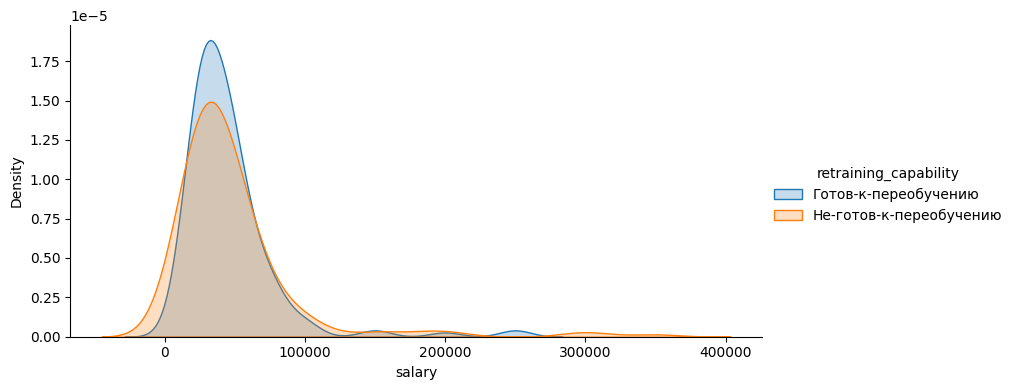

In [74]:
(sns.FacetGrid(df[(df['retraining_capability'].isin(df['retraining_capability'].value_counts()[:5].index.values)) ],\
               hue='retraining_capability', height = 4, aspect = 2).map(sns.kdeplot, 'salary', fill = True).add_legend())
plt.show()

Существенных различий между распределениями категорий не выявлено

**Experience**

Text(0.5, 0, 'Опыт, г')

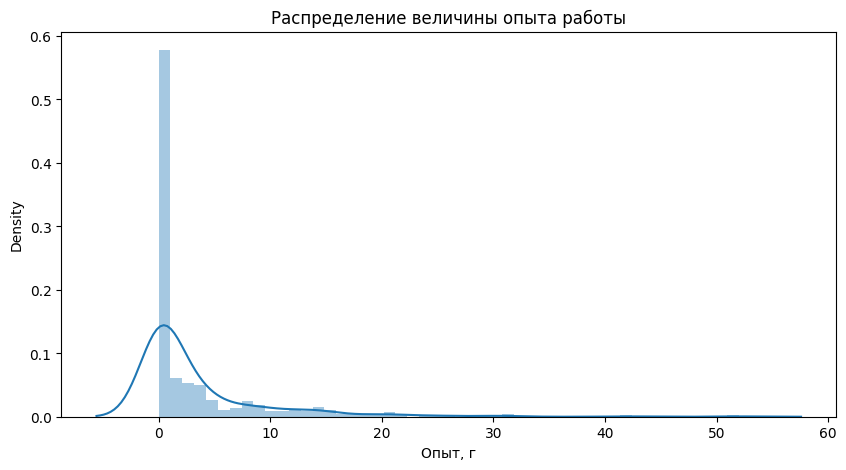

In [75]:
plt.figure(figsize = (10,5))
sns.distplot(df.experience)
plt.title("Распределение величины опыта работы")
plt.xlabel("Опыт, г")

In [76]:
len(df.loc[(df['experience'] == 0)])

208

Почти для половины наблюдений колонка experience равна нулю

###Features vs Target

In [77]:
for col in ["education", "drive_license", "busy_type", "business_trip", "retraining_capability", 'city']:
    fig = go.Figure()

    for value in df[col].unique():
        fig.add_trace(go.Box(y = df.loc[(df[col] == value), "salary"], name = str(value), boxpoints="outliers"))

    fig.update_layout(title=f"Распределение заработных плат по <b>{col}</b>")

    fig.show()

1. Медианная заработная плата для сотрудников, имеющих высшее образование, наибольшая.

2. Согласно боксплотам, у сотрудников, имеющих категорию A-B,  медианная зарплата выше, чем у остальных. Однако этой категории принадлежит лишь 3 наблюдения, это может вводить в заблуждение.

3. Медиана зарплаты для удаленной работы наивысшая. Однако выбросы в виде наибольших зарплат в выборке принадлежат категории полная занятость.

4. Q1, Q2, Q3 у готовых к командировкам больше, чем у не готовых к командировкам

5. У сотрудников, замотивированных к переобучению, медиана зарплаты выше на 5к, чем у остальных

6. В городах-мультимиллионерах (Москва, СПб) зарплата значительно выше



In [78]:
fig = px.scatter(df, x='experience', y='salary')
fig.show()

In [79]:
df[['experience', 'salary']].corr()

,experience,salary
experience,1.00000,0.20471
salary,0.20471,1.00000


Как правило, наблюдается существенная прямая зависимость между опытом работы и заработной платой. В нашем случае она не такая сильная. Объяснить это можно тем, что более чем для половины наблюдений experience == 0.

##Моделирование

In [80]:
final_df = df.copy()

In [81]:
final_df.education = final_df.education.map({'Unknown': 0,
                  'Среднее': 1,
                  'Среднее-профессиональное': 2,
                  'Незаконченное-высшее': 3,
                  'Высшее': 4})

In [82]:
def Positions_reduction(x):

    if (x.find("инженер-программист") >= 0):
        final_df['position_name'].replace(x, 'инженер-программист', inplace = True)
    elif (x.find("техник-программист") >= 0) :
        final_df['position_name'].replace(x, 'техник-программист', inplace = True)
    elif (x.find("программист-1с") >= 0):
        final_df['position_name'].replace(x, 'программист-1с', inplace = True)
    elif (x.find("программист") >= 0 and len(x) == 11):
        final_df['position_name'].replace(x, 'программист', inplace = True)
    else:
        final_df['position_name'].replace(x, 'другой программист', inplace = True)


for i in final_df['position_name']:
    Positions_reduction(i)
final_df['position_name'].value_counts(normalize = True)

программист            0.539192
другой программист     0.270784
инженер-программист    0.095012
техник-программист     0.052257
программист-1с         0.042755
Name: position_name, dtype: float64

In [83]:
final_df.drop(['date_create', 'date_modify', 'published_date', 'schedule_type'], axis = 1, inplace = True)

In [84]:
for i, t in final_df.loc[:, final_df.columns != 'id'].dtypes.items():
    if t == object:
        final_df[i].fillna('unknown', inplace = True)
        final_df[i] = pd.factorize(final_df[i])[0]

In [85]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421 entries, 0 to 424
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   id                             421 non-null    object
 1   abilympics_participation       421 non-null    bool  
 2   worldskills_inspection_status  421 non-null    int64 
 3   state_region_code              421 non-null    int64 
 4   position_name                  421 non-null    int64 
 5   home_city_code                 421 non-null    int64 
 6   education                      421 non-null    int64 
 7   drive_license                  421 non-null    int64 
 8   code_country                   421 non-null    int64 
 9   nark_inspection_status         421 non-null    int64 
 10  experience                     421 non-null    int64 
 11  salary                         421 non-null    int64 
 12  busy_type                      421 non-null    int64 
 13  busin

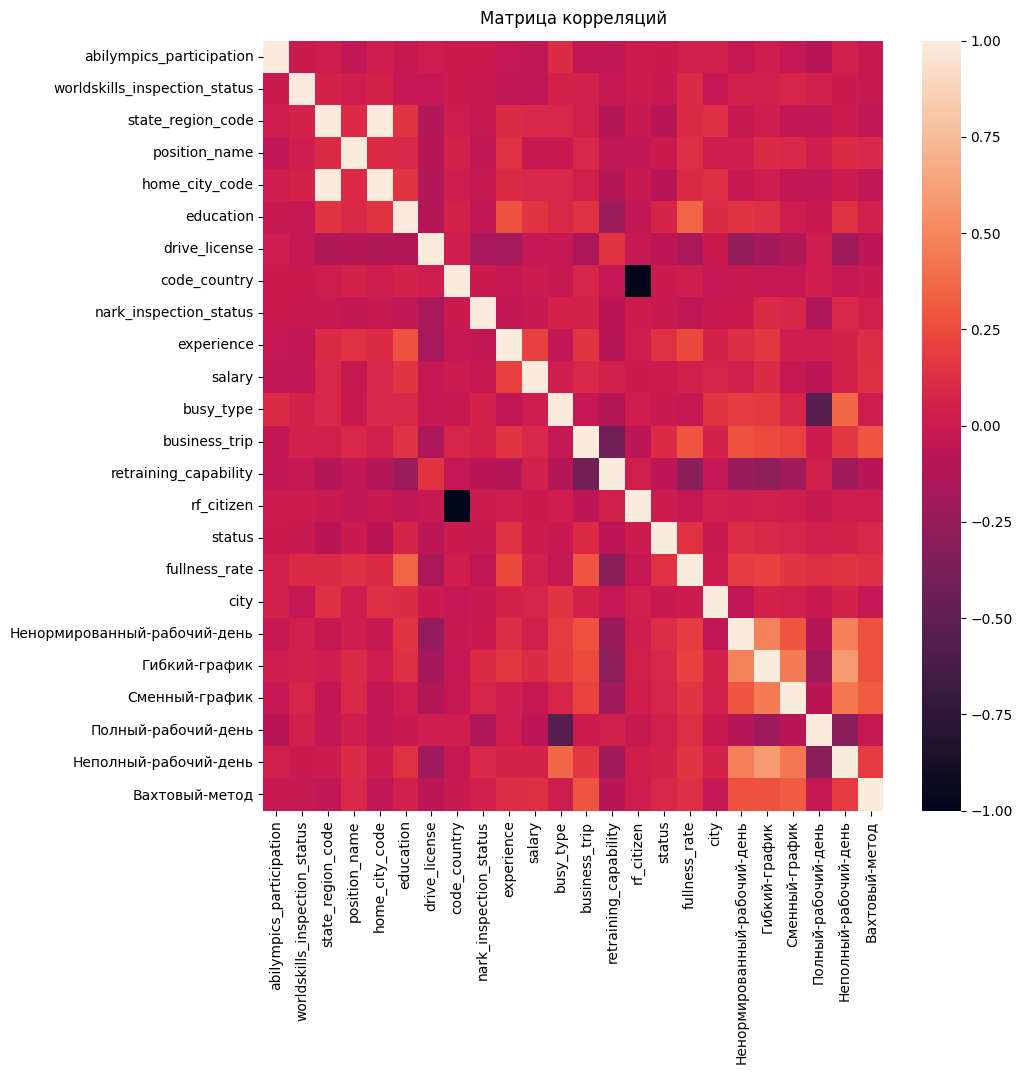

In [86]:
plt.figure(figsize = (10, 10))
heatmap = sns.heatmap(final_df.corr(), vmin = -1, vmax = 1)
heatmap.set_title('Матрица корреляций', fontdict= {'fontsize': 12} , pad = 12);

###Machine Learning

Очистим выбросы в данных при помощи расчета межквартильного размаха

In [87]:
def find_outliers(data):
    global q_list
    q_list = []
    sorted_data = data.sort_values()

    for q, p in {"Q1": 25, "Q2": 50, "Q3": 75}.items():

        # Расчет Q1, Q2, Q3 и межквартильного размаха.
        Q = np.percentile(sorted_data, p, interpolation = 'midpoint')
        q_list.append(Q)

        print("{}: {} перцентиль величины {} составляет ".format(q, p, data.name), Q)
    global Q1, Q2, Q3

    Q1 = q_list[0]
    Q2 = q_list[1]
    Q3 = q_list[2]

    IQR = Q3 - Q1
    print("Межквартильный размах составляет ", IQR)

    # Ищем нижнюю и верхнюю границы по формуле Q1 – 1.5 IQR и Q3 + 1.5 IQR, соответственно
    global low_lim, up_lim

    low_lim = Q1 - 1.5 * IQR
    up_lim = Q3 + 1.5 * IQR

    print(" ")
    print("Нижняя граница ", low_lim)
    print("Верхняя граница ", up_lim)


    # Находим выбросы
    outliers =[]
    for x in sorted_data:
        if ((x > up_lim) or (x < low_lim)):
             outliers.append(x)
    print(f"\n{len(outliers)} выбросов в датасете:", outliers, )

In [88]:
find_outliers(final_df.salary)

Q1: 25 перцентиль величины salary составляет  25000.0
Q2: 50 перцентиль величины salary составляет  40000.0
Q3: 75 перцентиль величины salary составляет  50000.0
Межквартильный размах составляет  25000.0
 
Нижняя граница  -12500.0
Верхняя граница  87500.0

30 выбросов в датасете: [90000, 90000, 90000, 100000, 100000, 100000, 100000, 100000, 100000, 100000, 100000, 100000, 100000, 100000, 150000, 150000, 150000, 150000, 150000, 180000, 200000, 200000, 200000, 200000, 250000, 250000, 250000, 300000, 300000, 350000]


In [89]:
# Очистим данные от выбросов
final_df = final_df[(final_df.salary < up_lim) & (final_df.salary > low_lim)]
print("Минимальная зарплата: {}".format(final_df.salary.min()))
print("Максимальная зарплата: {}".format(final_df.salary.max()))

Минимальная зарплата: 5000
Максимальная зарплата: 80000


In [90]:
final_df.shape

(391, 25)

In [91]:
fig = px.box(final_df, y="salary", points="all")
fig.show()

Очищенное распределение выглядит куда лучше!

###Train Test Split

У нас не много наблюдений для построения модели. Разобьем датасет на тренировочную (80%) и тестовую (20%) выборки

In [92]:
test_size = 0.2
test_index = int(len(final_df) * (1 - test_size))

In [93]:
X_train = final_df.loc[:test_index].drop(["salary"], axis=1)
y_train = final_df.loc[:test_index]["salary"]

X_test = final_df.loc[test_index + 1:].drop(["salary"], axis=1)
y_test = final_df.loc[test_index + 1:]["salary"]

In [94]:
X_train.shape, y_train.shape

((292, 24), (292,))

In [95]:
X_test.shape, y_test.shape

((99, 24), (99,))

In [96]:
train_id = X_train['id']
test_id = X_test['id']

In [97]:
X_train = X_train.drop(['id'], axis = 1)
X_test  = X_test.drop(['id'], axis = 1)

Для построения модели я выбрала *LGBMRegressor*, подобрала параметры при помощи GridSearchCV.

В качестве метрики посмотрим на *rmse*.

In [98]:
from sklearn.model_selection import StratifiedKFold, GroupKFold, RepeatedKFold, cross_val_score
import lightgbm as lgb
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.model_selection import cross_validate, train_test_split, GridSearchCV, learning_curve

In [99]:
param_grid = {
    'learning_rate': [0.01, 0.03],
    'max_depth': [2, 3],
    'max_iter': [250, 300],
    'num_leaves': [8, 10, 12],
    'bagging_fraction' : [0.50, 0.60, 0.70],
    'feature_fraction': [0.50, 0.60, 0.70],
    "bagging_frequency" : [3, 5, 7]}


model = lgb.LGBMRegressor(n_estimators = 3000, metric = "rmse")
grid_search = GridSearchCV(estimator = model, param_grid = param_grid, cv = 5)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
print("Best Hyperparameters:", best_params)
y_pred = best_model.predict(X_test)
rms = sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", rms)

Выходные данные были обрезаны до нескольких последних строк (5000).
[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] num_iterations is set=250, max_iter=250 will be ignored. Current value: num_iterations=250
[LightGBM] [Warning] Unknown parameter: bagging_frequency
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6
[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] num_iterations is set=250, max_iter=250 will be ignored. Current value: num_iterations=250
[LightGBM] [Warning] Unknown parameter: bagging_frequency
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6
[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature

<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

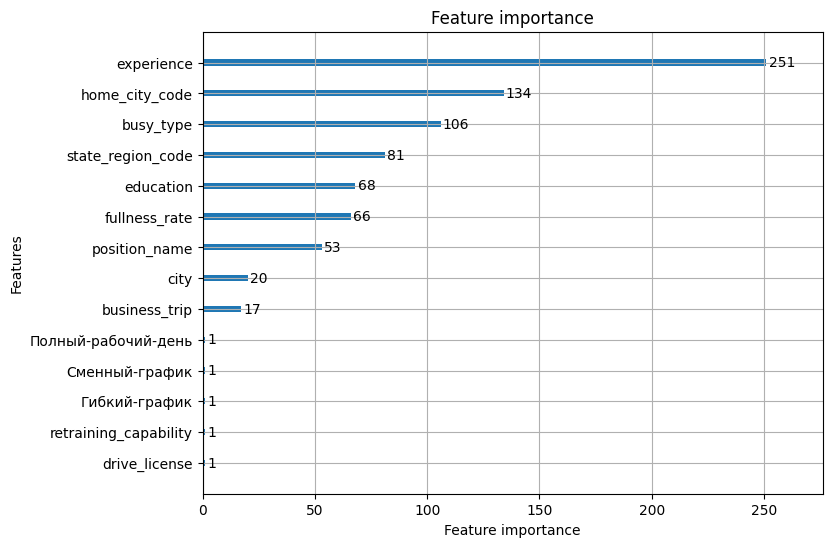

In [100]:
# значимость переменных
lgb.plot_importance(best_model, figsize = (8,6))

####Вывод:



Данная базовая модель не обладает достаточной предсказательной силой, однако теперь мы имеем представление о наиболее значимых признаках. Качество модели может быть улучшено путем:



*   сбора дополнительных данных -- мы имеем небольшую выборку, где распределения величин зависят от выбросов и дисбаланса классов
*   использования подхода Bag of Words для некоторых переменных (например, hardSkills, softSkills, workExperienceList, educationList)
* прогнозированием логарифма заработной платы, а не реальной величины: после преобразования переменная будет не так чувствительна к выбросам, распределение величины будет более компактным (график Логарифмическое распределение величины salary)


Наиболее сильными предикторами оказались факторы experience, home_city_code, busy_type, state_region_code. Это подчиняется здравому смыслу. Таким образом, заработная плата специалиста в большой мере зависит от его опыта, локации, типа занятости

